## Jwean Dabre
## Roll NO 13
##  28\1\2026

## LR Using OLS

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
x = np.array([1,2,3]).reshape(-1,1)
y = np.array([2,3,5])


In [3]:
model = LinearRegression()
model.fit(x, y)


LinearRegression()

In [6]:
w = model.coef_[0]
b = model.intercept_
print(f"The slope is:{w}")
print(f"The intercept is:{b}")

The slope is:1.4999999999999993
The intercept is:0.3333333333333348


In [8]:
y_pred = model.predict(x)
print("\npredictions for treaining data")
for xi,yi,ypi in zip(x.flatten(),y,y_pred):
    print(f"x = {xi}, Actual y ={yi}, Predicted y ={ypi}")


predictions for treaining data
x = 1, Actual y =2, Predicted y =1.8333333333333341
x = 2, Actual y =3, Predicted y =3.3333333333333335
x = 3, Actual y =5, Predicted y =4.833333333333333


## LR Using MLE

In [18]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.optimize import minimize

In [19]:
x = np.array([1,2,3]).reshape(-1,1)
y = np.array([2,3,5])

In [26]:
def neg_log_likelihood(params):
    w, p = params
    sigma2  = 1
    y_pred = w*x + b
    nll = 0.5*np.sum(y-y_pred)**2/sigma2
    return nll

In [27]:
initial_guess=[0,0]


In [29]:
result = minimize(neg_log_likelihood, initial_guess)
w_mle, b_mle = result.x
print(f"slope is {w_mle}")
print(f"intercept is {b_mle}")

slope is 1.4999999936468338
intercept is 0.0


In [31]:
y_pred = w_mle * x + b_mle
print("\npredictions for training data")
for xi, yi, ypi in zip(x.flatten(), y, y_pred):
    print(f"x = {xi}, Actual y = {yi}, Predicted y = {ypi}")



predictions for training data
x = 1, Actual y = 2, Predicted y = [1.49999999]
x = 2, Actual y = 3, Predicted y = [2.99999999]
x = 3, Actual y = 5, Predicted y = [4.49999998]


In [32]:
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"Mean Squared Error is: {mse}")
print(f"R2_Score is: {r2}")


Mean Squared Error is: 0.16666667513755526
R2_Score is: 0.8928571374115716


## LR Using GD

In [33]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [34]:
x = np.array([1,2,3]).reshape(-1,1)
y = np.array([2,3,5])


In [35]:

w, b = 0, 0
alpha = 0.001
n_iter = 1000
n = len(x)



In [38]:

for i in range(n_iter):
    y_pred = w * x.flatten() + b
    dw = (-2/n) * np.sum(x.flatten() * (y - y_pred))
    db = (-2/n) * np.sum(y - y_pred)
    w = w - alpha * dw
    b -= alpha * db
print(f"slope is : {w}")
print(f" bias is : {b}")

slope is : 1.4255937925924391
 bias is : 0.5024761311596452


## LR Using GD with single parameter

In [40]:


import numpy as np
import matplotlib.pyplot as plt


In [41]:
x = np.array([1, 2, 3]).reshape(-1, 1)
y = np.array([2, 3, 5])
n = len(x)

In [42]:
def loss(w1):
    w0 = np.mean(y) - w1 * np.mean(x)
    y_pred = w1 * x + w0
    return np.sum((y - y_pred)**2)

In [44]:
def gradient(w1):
    w0 = np.mean(y) - w1 * np.mean(x)
    y_pred = w1 * x + w0
    return -2/n * np.sum(x * (y - y_pred))


In [46]:
lr = 0.1
w1 = 4
iter = 15

w1_values = []
loss_values = []

for i in range(iter):
    w1_values.append(w1)
    loss_values.append(loss(w1))
    grad = gradient(w1)
    w1 -= lr * grad


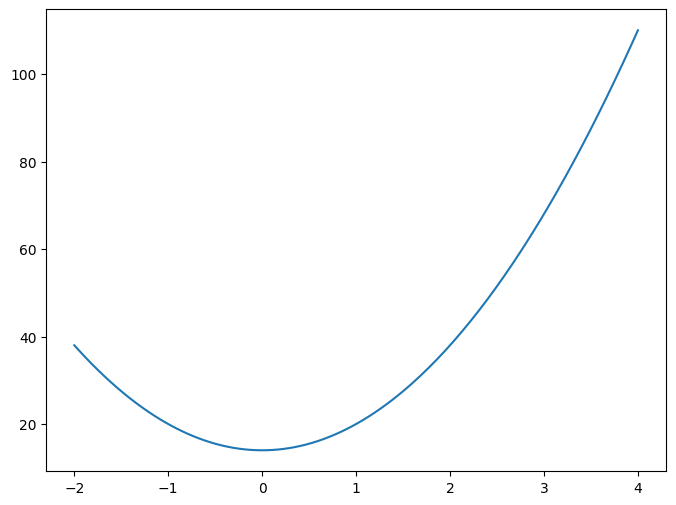

In [47]:
w_space = np.linspace(-2, 4, 200)
loss_space = [loss(w) for w in w_space]

plt.figure(figsize=(8, 6))
plt.plot(w_space, loss_space, label="J(w1)")

